Removed "PyLTR" import, which does not appear to be used anywhere.

In [2]:
import datetime,os
import matplotlib.dates as mdates

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
numpts = 8*60
shocktime = 6*60

In [5]:
time = arange(numpts)

In [6]:
startdate = datetime.datetime(2015,3,21,0,0,0)
eventdate = []
for i in range(numpts):
    eventdate.append(startdate+datetime.timedelta(minutes=i))


In [7]:
den = time*0.0 + 5.0
den[6*60:] = 20.0

In [8]:
vx = time*0-350.0
vx[shocktime:] = -2700.0
vy = time*0
vz = time*0

The sound speed calculation seems to assume a number density of 1cc (proton only) and a temperature of 1.5x10^5 kelvins.  This is reasonable for more frequent solar events.  However, for events such as the Halloween event, temperatures of >1E6 are observed.

In [9]:
cs = time*0 + sqrt(1.5e5*1.38e-23/1.67e-27/1.0e6)

In [10]:
bx = time*0
by = time*0
bz = time*0
bz[0:120] = -5.0
bz[120:240] = 5.0
bz[240:shocktime]=-5.0
bz[shocktime:] = 127.0
b = sqrt(bx*bx+by*by+bz*bz)

Changed paths to be for local machine.  Originally:

`path = '/glade/u/home/wiltbemj/Python/LoveExtreme'
pdffile = 'LoveExtremeSW-north.pdf'
label = 'Love Extreme Event SW Conditions'`

In [11]:
path = './'
pdffile = 'LoveExtremeSW-north.pdf'
label = 'Love Extreme Event SW Conditions'

In [12]:
#rcParams.update(rcParamsDefault)
#rcParams['figure.facecolor'] = (1, 1, 1, 0)
#style.use(['presentation','mjwcolors'])

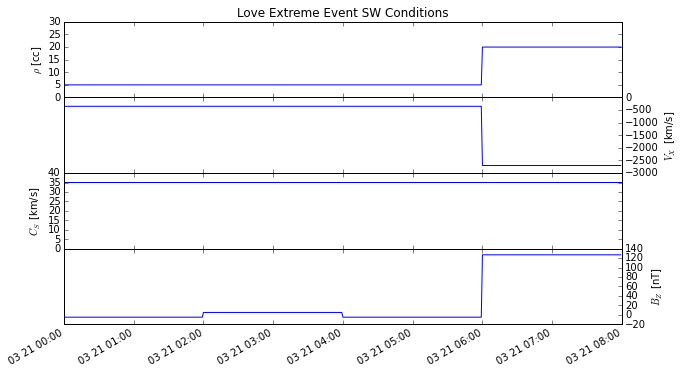

In [13]:
fig,ax = subplots(nrows=4,sharex=True,figsize=(10,6))
ax[0].plot(eventdate,den)
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%m %d %H:%M'))
ax[0].set_title(label)
ax[0].set_ylabel(r'$\rho$ [cc]')
ax[0].set_ylim((0,30))
ax[1].plot(eventdate,vx)
ax[1].yaxis.tick_right()
ax[1].yaxis.set_label_position('right')
ax[1].set_ylabel(r'$V_X$ [km/s]')
ax[2].plot(eventdate,cs)
ax[2].set_ylabel(r'$C_S$ [km/s]')
ax[2].set_ylim((0,40))
ax[3].plot(eventdate,bz)
ax[3].set_ylabel(r'$B_Z$ [nT]')
ax[3].yaxis.tick_right()
ax[3].yaxis.set_label_position('right')
fig.subplots_adjust(hspace=0)
ax[0].set_xlim([datetime.datetime(2015,3,21,0,0,0),datetime.datetime(2015,3,21,8,0,0)])
setp([a.get_xticklabels() for a in fig.axes[:-1]],visible=False)
ax[0].fmt_xdata=mdates.DateFormatter('%m %d-%H:%M')
fig.autofmt_xdate()
plt.show()
savefig(os.path.join(path,pdffile),format="pdf",bbox_inches='tight',pad_inches=0.05)

In [14]:
filename = 'sw-LoveExtreme-north.dat'
fh = open(filename,'w')
fh.write('%d %d %d %d \n' %(startdate.year,startdate.timetuple().tm_yday,
                            startdate.hour,startdate.minute))
fh.write('%d 11\n' % numpts)
fh.write(' DATA:\n')
fmtstr='%7.2f %4.1f %7.2f %7.2f %7.2f %7.2f %5.2f %6.2f %6.2f %6.2f %6.2f\n'
for i in xrange(numpts):
    tple=(time[i],den[i],vx[i],vy[i],vz[i],cs[i],bx[i],by[i],bz[i],b[i],0.0)
    fh.write(fmtstr % tple)
fh.close()

In [17]:
import spacepy.pybats as pb

This unreleased version of SpacePy is not supported by the SpacePy team.


In [21]:
imf = pb.ImfInput(load=False, npoints=numpts, filename='imf_extreme.dat')
imfvars = ['time', 'rho', 'bx', 'by', 'bz', 'ux', 'uy', 'uz']
lfmvars = [eventdate, den, bx, by, bz, vx, vy, vz]
for v1, v2 in zip(imfvars, lfmvars):
    imf[v1]=v2
imf['temp'] += 1.5E5 # Constant plasma temperature.
imf.write()

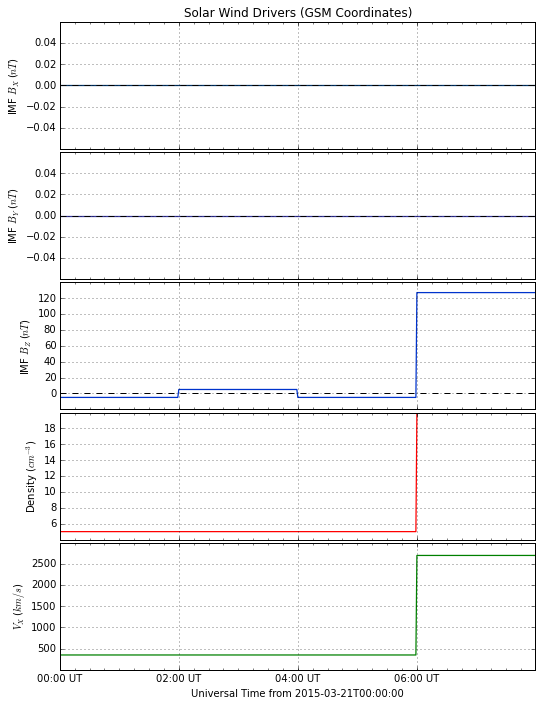

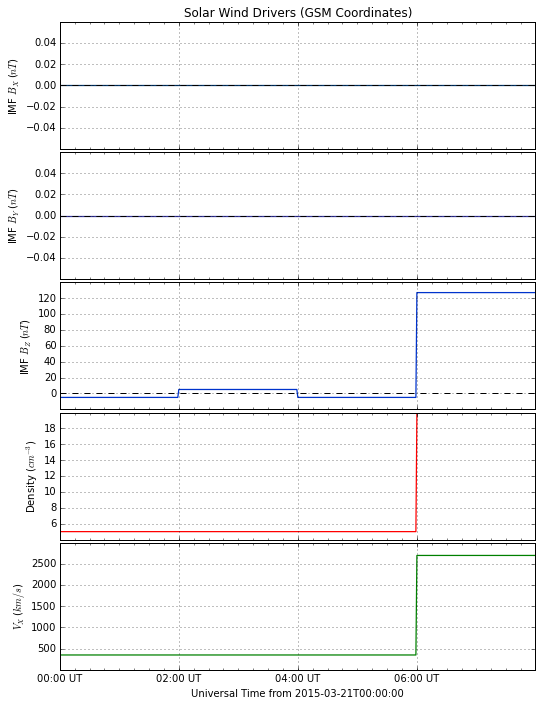

In [22]:
imf.quicklook()
